# Checking consistency between figures and model output

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

Calculating f1'
𝑓′1≈−0.75/(𝜀𝜎𝑇¯4s(1−𝑎𝐶2))

In [103]:
for a in [0.4, 0.6, 0.8]:
    print("f1prime {:.6f}".format(-0.75 / (0.97 * 5.67e-8 * 301 ** 4 * (1 - a * 0.6 ** 2))))
    
# actually applied f1p = -0.003 in script

f1prime -0.001941
f1prime -0.002119
f1prime -0.002333


## NINO3.4  trend in CMIP models

In [98]:
import pandas as pd
from src.constants import NINO34_TRENDS, NINO34_TRENDS_CMIP5 
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of ensemble members in bar')

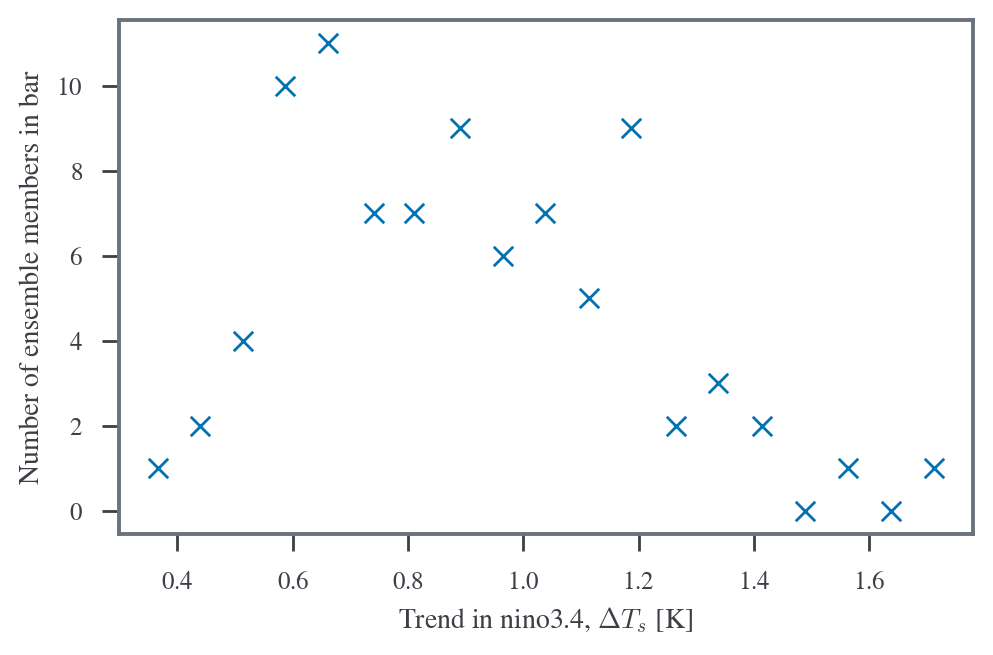

In [102]:
plt.scatter(
    pd.read_csv(NINO34_TRENDS_CMIP5)["Center of Bar"],
    pd.read_csv(NINO34_TRENDS_CMIP5)["Number of members"],
)
plt.xlabel(r"Trend in nino3.4, $\Delta T_s$ [K]")
plt.ylabel("Number of ensemble members in bar")

In [14]:
l = pd.read_csv(NINO34_TRENDS_CMIP5)["Center of Bar"].tolist()
(l[-1] - l[0]) / 19

0.07089096461289741

## Load in model results

In [33]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

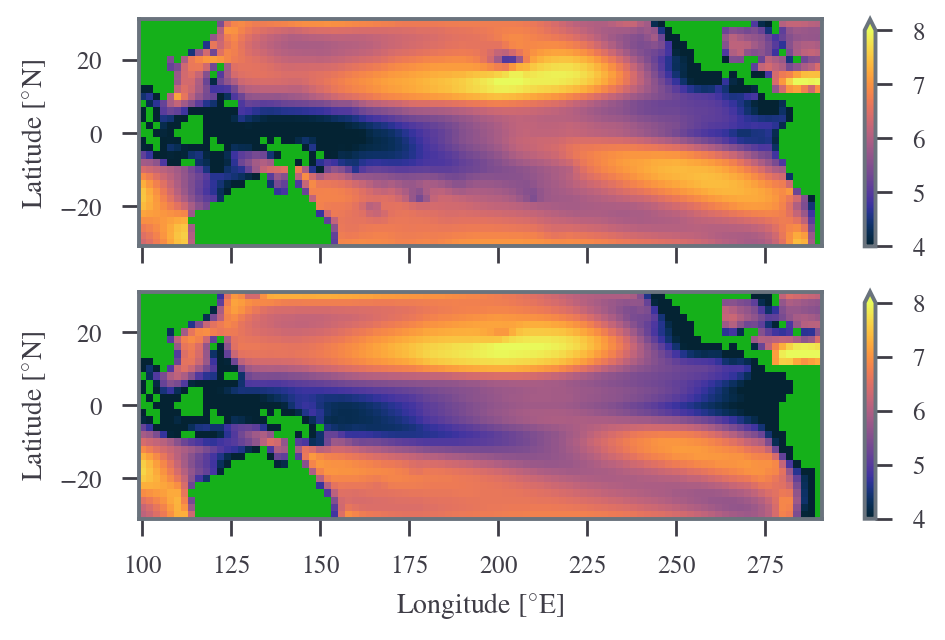

In [154]:
fig, axs = plt.subplots(2, 1, figsize=get_dim(ratio=0.3*2), sharex=True)
clip(can_coords(return_figure_ds("5a")["wnspClim"])).plot(ax=axs[0], cmap=cmap("sst"), vmin=4, vmax=8)
axs[0].set_xlabel("")
clip(can_coords(return_figure_ds("5d")["wnspClim"])).plot(ax=axs[1], cmap=cmap("sst"), vmin=4, vmax=8)

In [34]:
import os
import xarray as xr
import matplotlib.pyplot as plt

In [119]:
# Get the helper functions
from src.models.model_setup import ModelSetup
from src.xr_utils import open_dataset, open_dataarray, get_trend, clip, can_coords, sel
from src.utils import get_default_setup
from src.configs.load_config import load_config
from src.plot_utils import add_units, cmap, get_dim, label_subplots
from src.constants import UC_LOGS, FIGURE_DATA_PATH
from src.wandb_utils import setup_from_name
from src.visualisation.comp import comp_oc_sst, comp_atm_prwnd, comp_oc_htherm, return_figure_ds
uncoupled_run_dir = str(UC_LOGS / "it_1")
cfg = load_config(test=False)
fig_data = xr.open_dataset(FIGURE_DATA_PATH)
uncoup_setup = ModelSetup(uncoupled_run_dir, cfg, make_move=False)
coup_setup = get_default_setup()

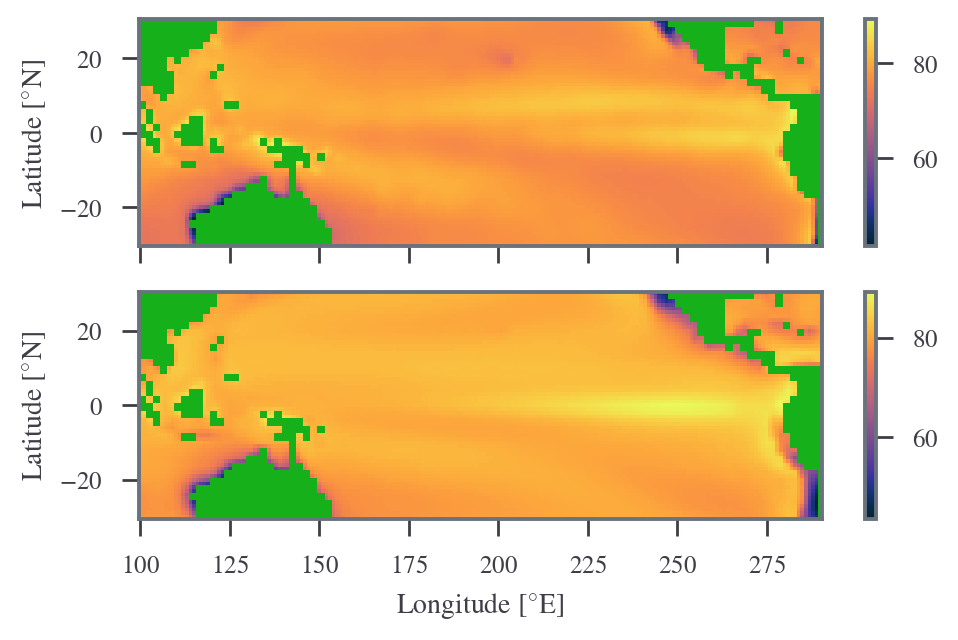

In [147]:
fig, axs = plt.subplots(2, 1, figsize=get_dim(ratio=0.3*2), sharex=True)
clip(can_coords(xr.open_dataarray(setup_from_name("ECMWF_coup").clim60_name(3)))).plot(ax=axs[0], cmap=cmap("sst"))
axs[0].set_xlabel("")
clip(can_coords(xr.open_dataarray(setup_from_name("C_RH_coup").clim60_name(3)))).plot(ax=axs[1], cmap=cmap("sst"))

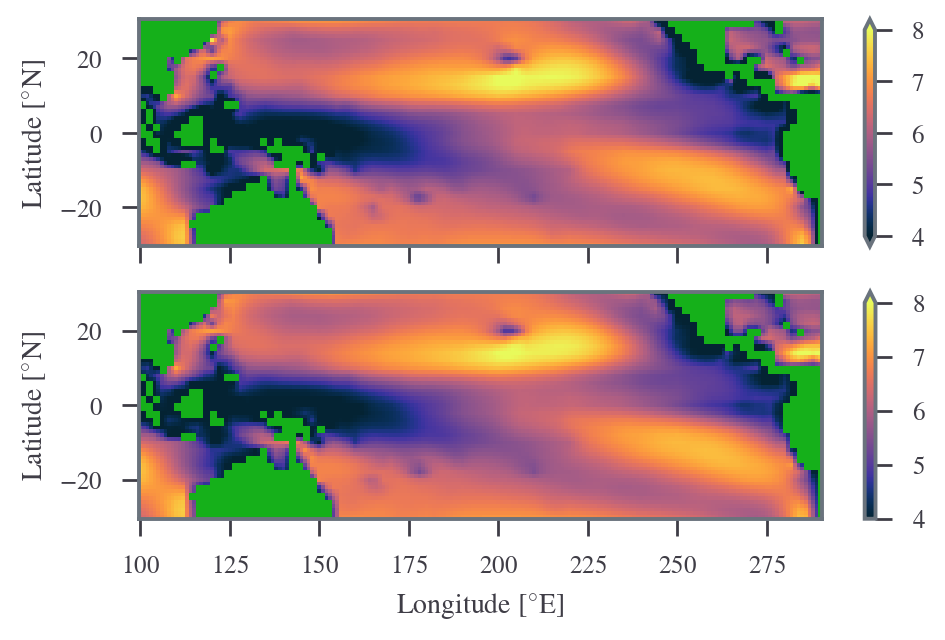

In [145]:
fig, axs = plt.subplots(2, 1, figsize=get_dim(ratio=0.3*2), sharex=True)
clip(can_coords(xr.open_dataarray(setup_from_name("C_RH_coup").clim60_name(2)))).plot(ax=axs[0], cmap=cmap("sst"), vmin=4, vmax=8)
axs[0].set_xlabel("")
clip(can_coords(xr.open_dataarray(setup_from_name("C_RH_W_coup").clim60_name(2)))).plot(ax=axs[1], cmap=cmap("sst"), vmin=4, vmax=8)



In [118]:
coup_setup.cfg.comp.sst

'5a'

In [114]:
coup_setup.clim_name(2)

'/gws/nopw/j04/ai4er/users/sdat2/sensitivity/k_days_logs/k_days_10/atmos/DATA/sfcWind-ECMWF-clim.nc'

## Figure 1d 
d–f, Simulations from the ocean model forced by rising CO2 and observed winds (d), observed winds only, with fixed CO2 (e) and rising CO2 with fixed winds (f). The observed SST trend of no warming in the cold tongue amid widespread warming can be reproduced by the ocean model as a combined thermodynamic and dynamic response to CO2 and wind stress change. g, Distribution of 60-year trends in the NINO3.4 SST index (SST averaged over 5° S−5° N and 170° W−120° W) for end dates from 2008–2017 for 88 individual CMIP5 model runs and 35 NCAR LENS runs, together with observational estimates from ECMWF, HadISST, National Centers for Environmental Prediction (NCEP)/NCAR and ERSSTv5 SST analyses. The observed SST trends ending in the current decade are either colder than, or at the very limit of, the range of trends in individual CMIP5 and LENS model runs.

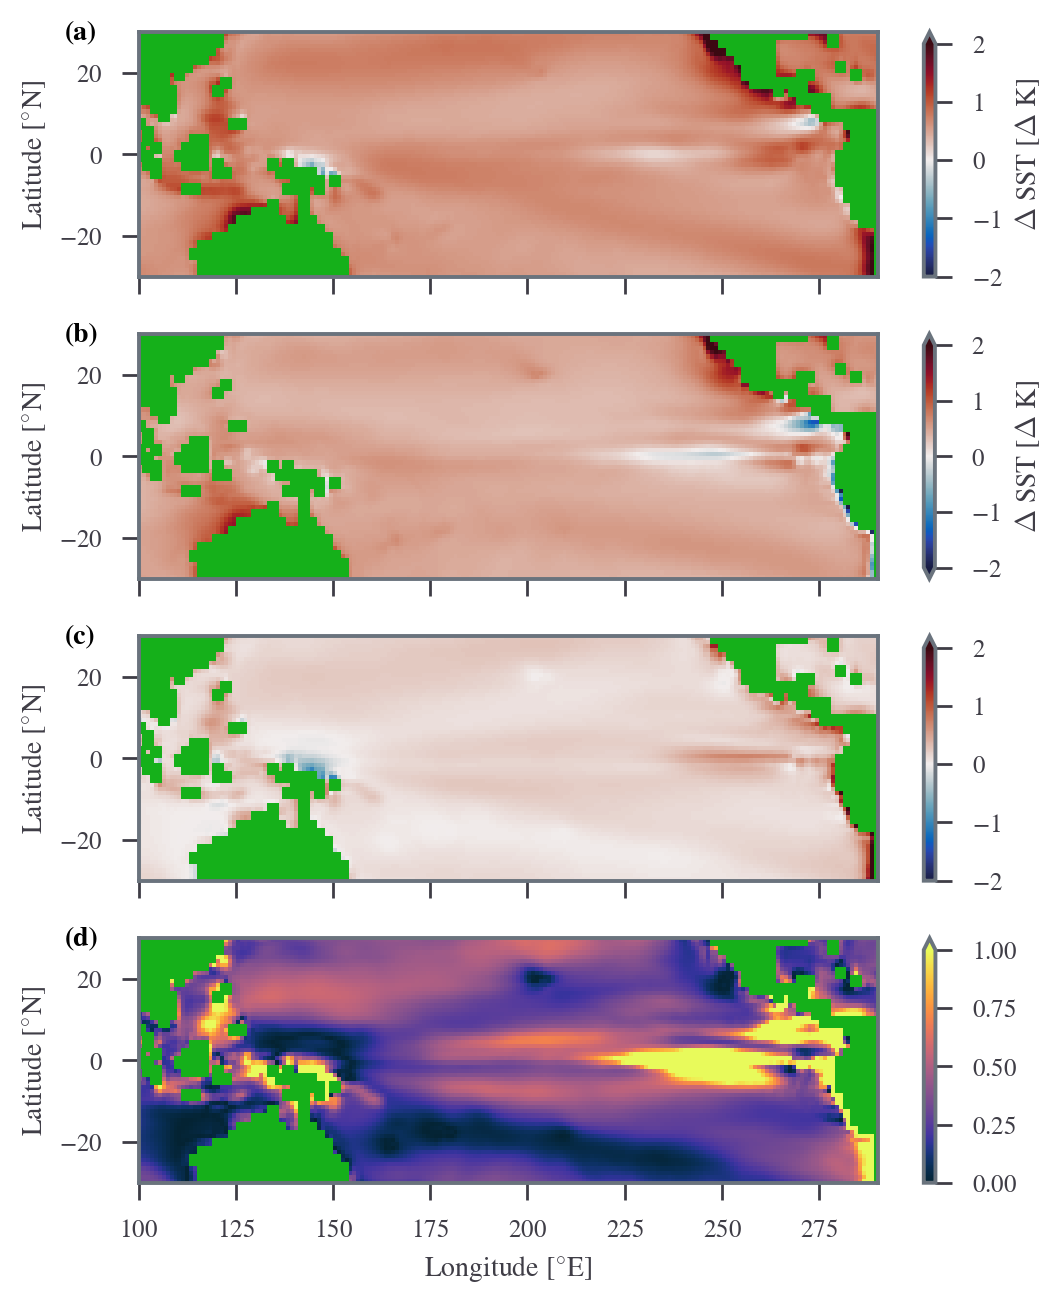

In [81]:
comp_oc_sst(uncoup_setup, "1d", var="SST", show_plots=True)

## Figure 2d
Trends in surface winds (vectors; the arrow in the bottom right of each panel is a scale bar representing 1 m s−1) and precipitation (colours/contours and numerical labels; see also scale bar), based on ECMWF reanalysis over 1958–2017 simulations by the atmosphere model forced by the observed ECMWF ORAS4 SST trend only (c) and simulations by the atmosphere model forced by trends in ECMWF SST and heating over land (d).

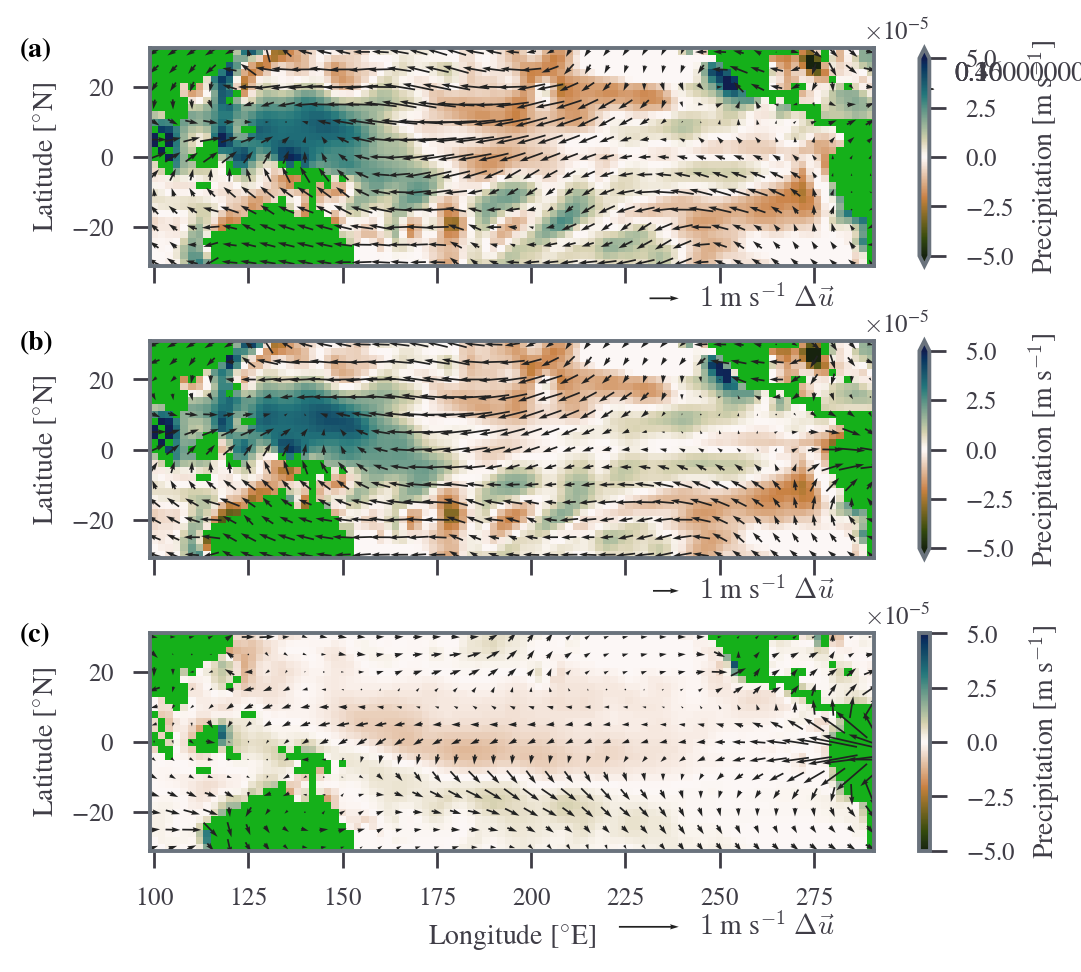

In [82]:
comp_atm_prwnd(uncoup_setup, "2d", show_plots=True)

## Figure 3
a,b, SST change (a; colours/contours and numerical labels (in K)) and precipitation change (b; colours/contours and numerical labels (in mm d−1) for the model forced only by the CO2 change over 1958–2017 and the precipitation trend over the Amazon. The vectors in b represent change in surface wind vectors (scale bar in m s−1).

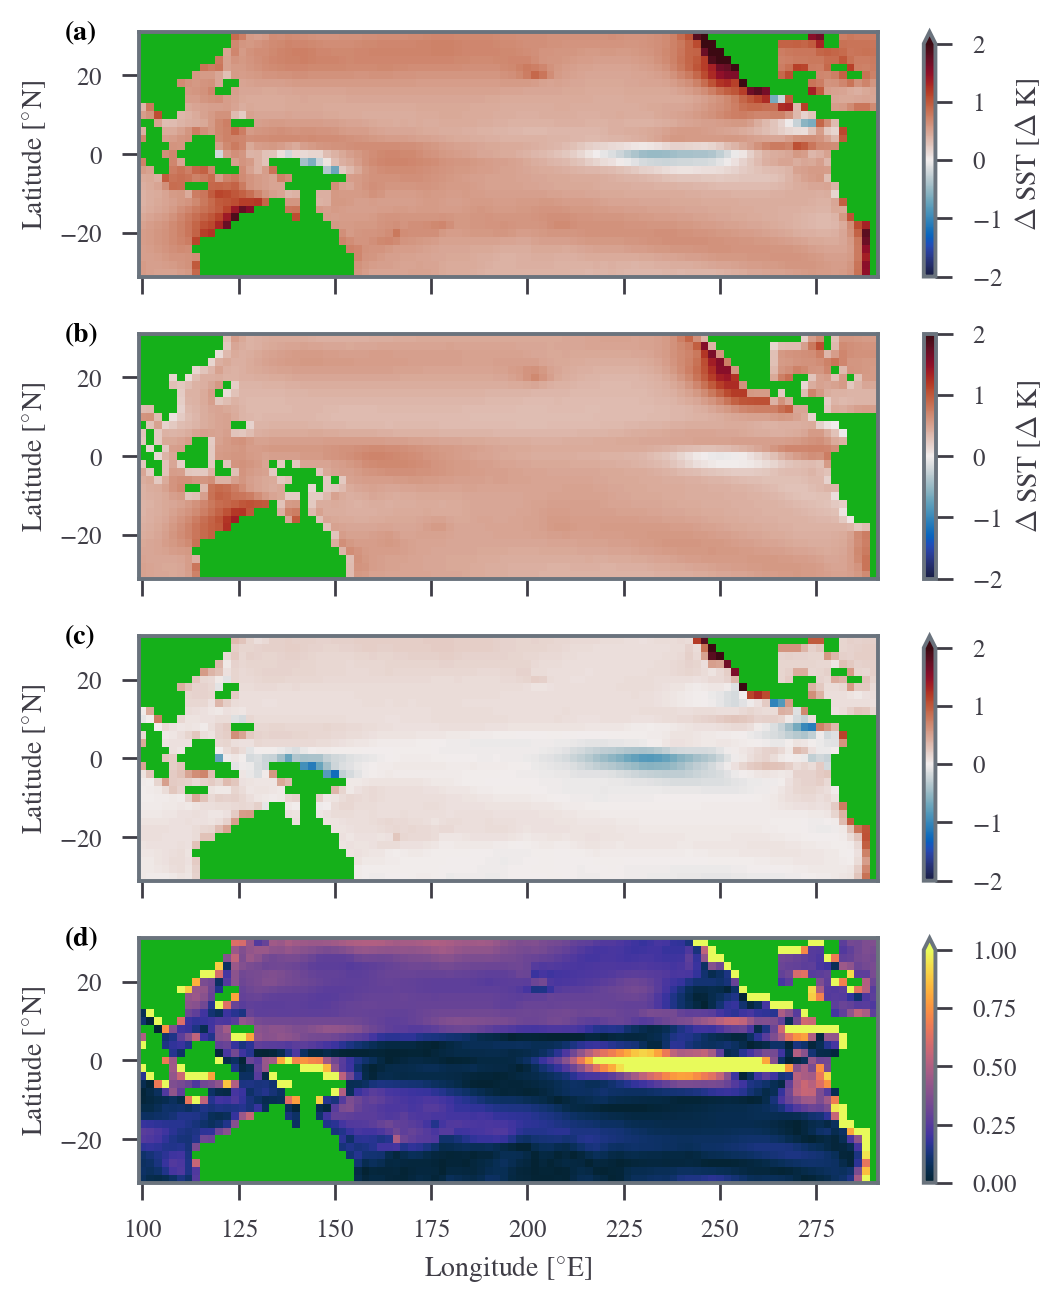

In [83]:
comp_oc_sst(coup_setup, "3", show_plots=True)

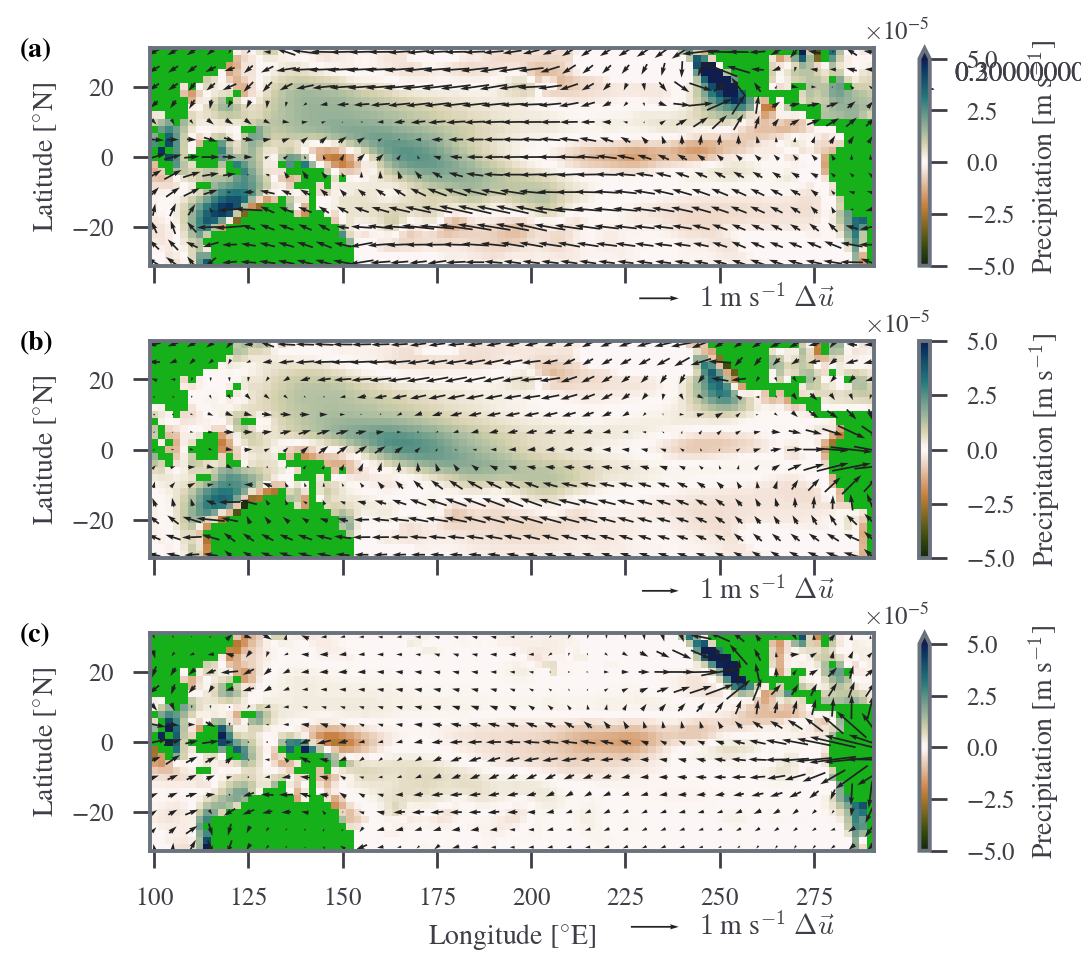

In [85]:
comp_atm_prwnd(coup_setup, "3", show_plots=True)

## Figure 4
The ocean model forced by the same winds used to force ORAS4 (b) and the equilibrium state of our coupled atmosphere–ocean model (c). Units for thermocline depth are in m. The coupled model has more wind-forced zonal asymmetry of the equatorial thermocline change than ORAS4, related to differences in equatorial zonal wind stress change. The simulated shoaling in the upwelling region drives the cooling tendency in the cold tongue, and the basin mean component of shoaling is important and driven by off-equatorial trade wind strengthening.

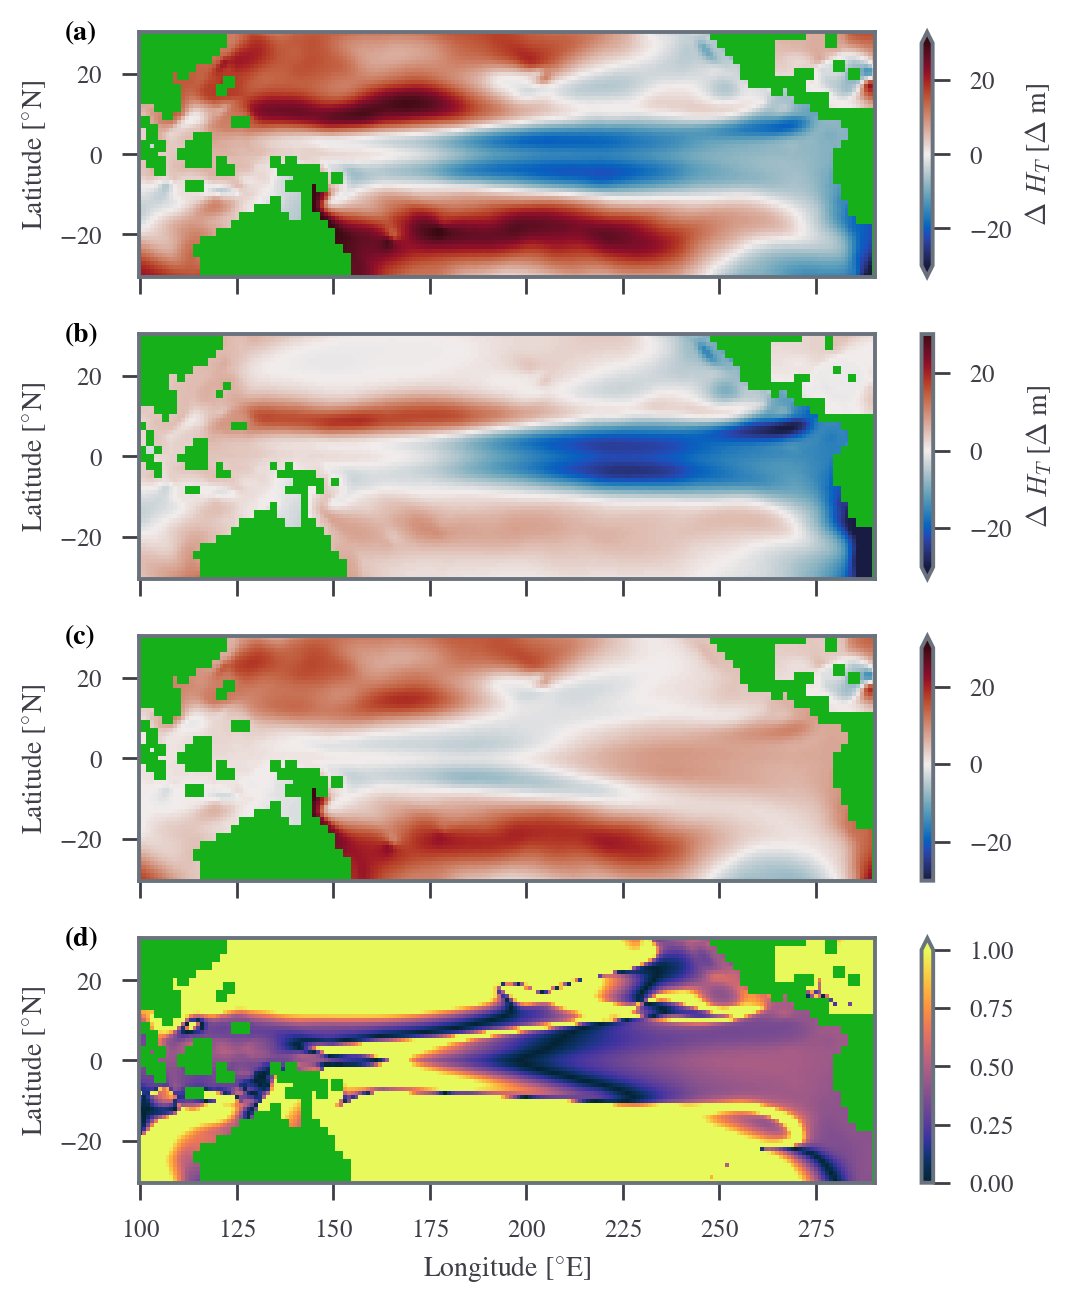

In [88]:
comp_oc_htherm(uncoup_setup, "4b", show_plots=True)

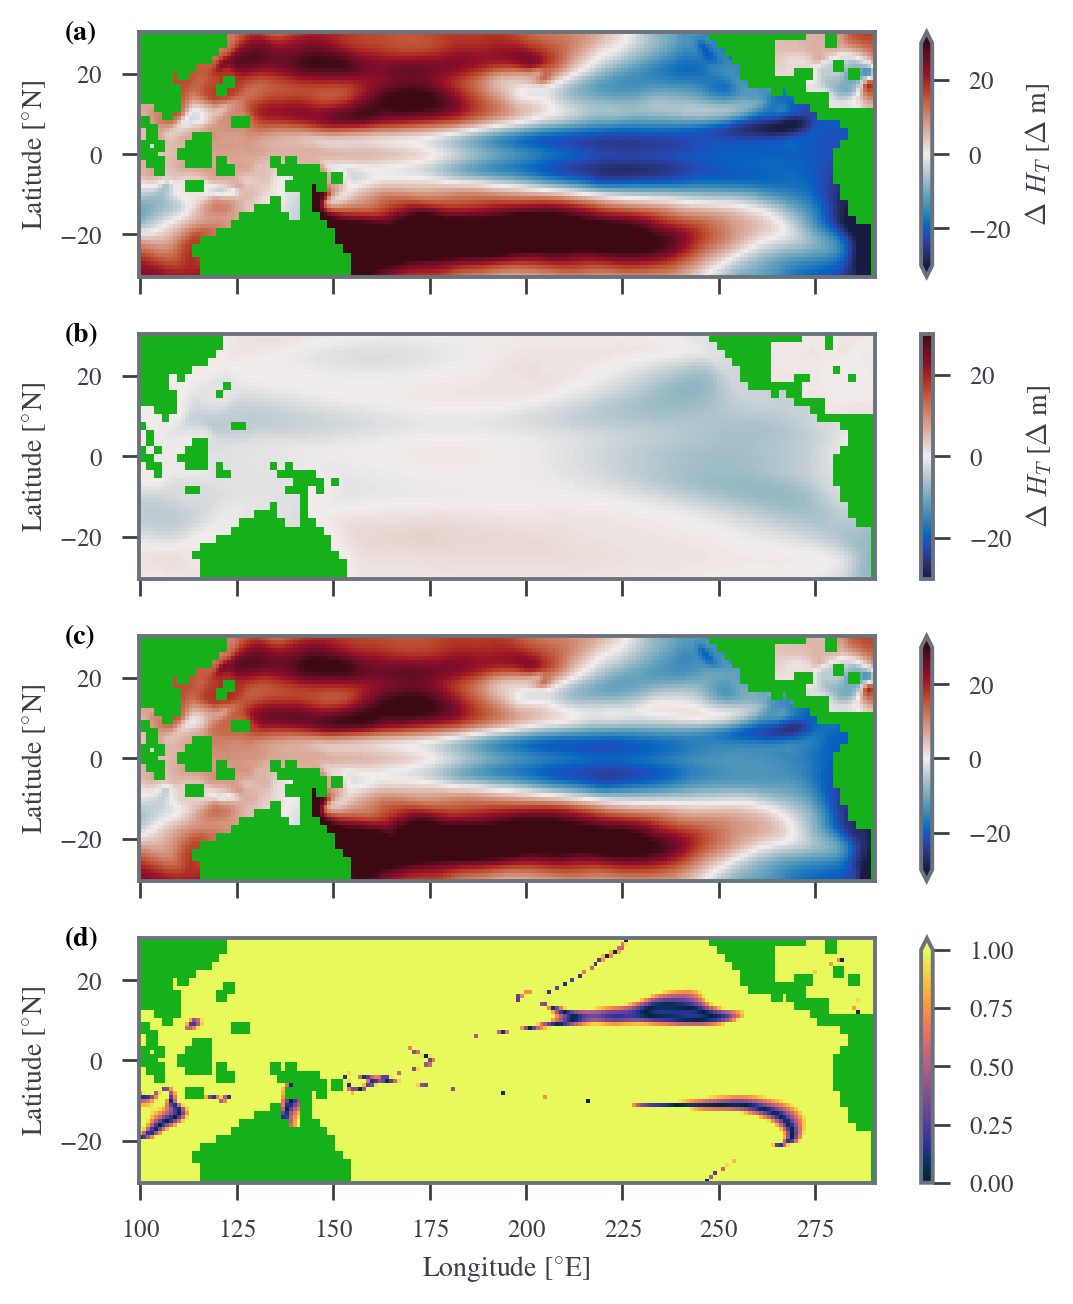

In [91]:
comp_oc_htherm(coup_setup, "4c", show_plots=True)

## Figure 5a
a–d, Trends in winds (vectors; scale bar in m s−1) and SST (colours; see scale bar) over 1958–2017 within the coupled model (CM), moving from the observed world to the CMIP5 world. In a, the observed spatially varying relative humidity (%, contours) from ECMWF is imposed in the model instead of a uniform value (‘CM-ECMWF world’ in e)

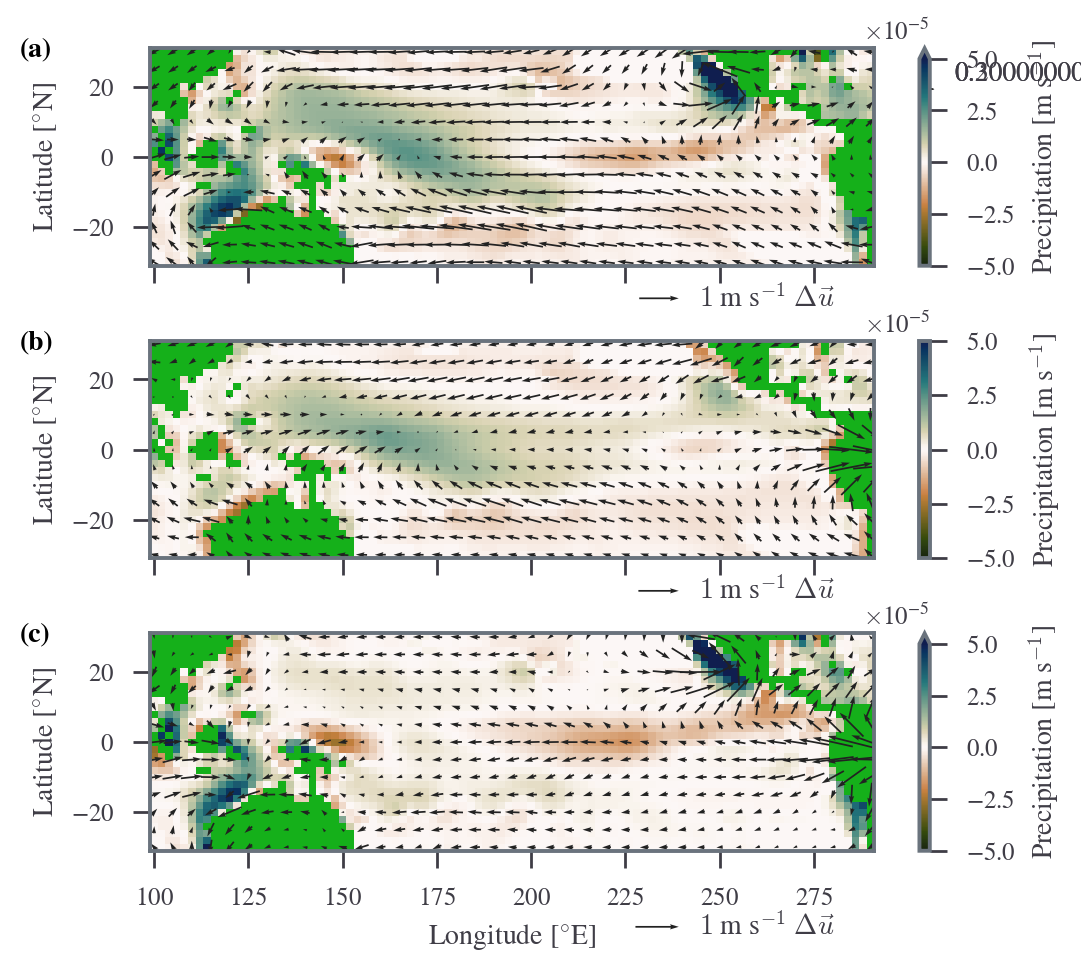

In [90]:
comp_atm_prwnd(coup_setup, "5a", show_plots=True)

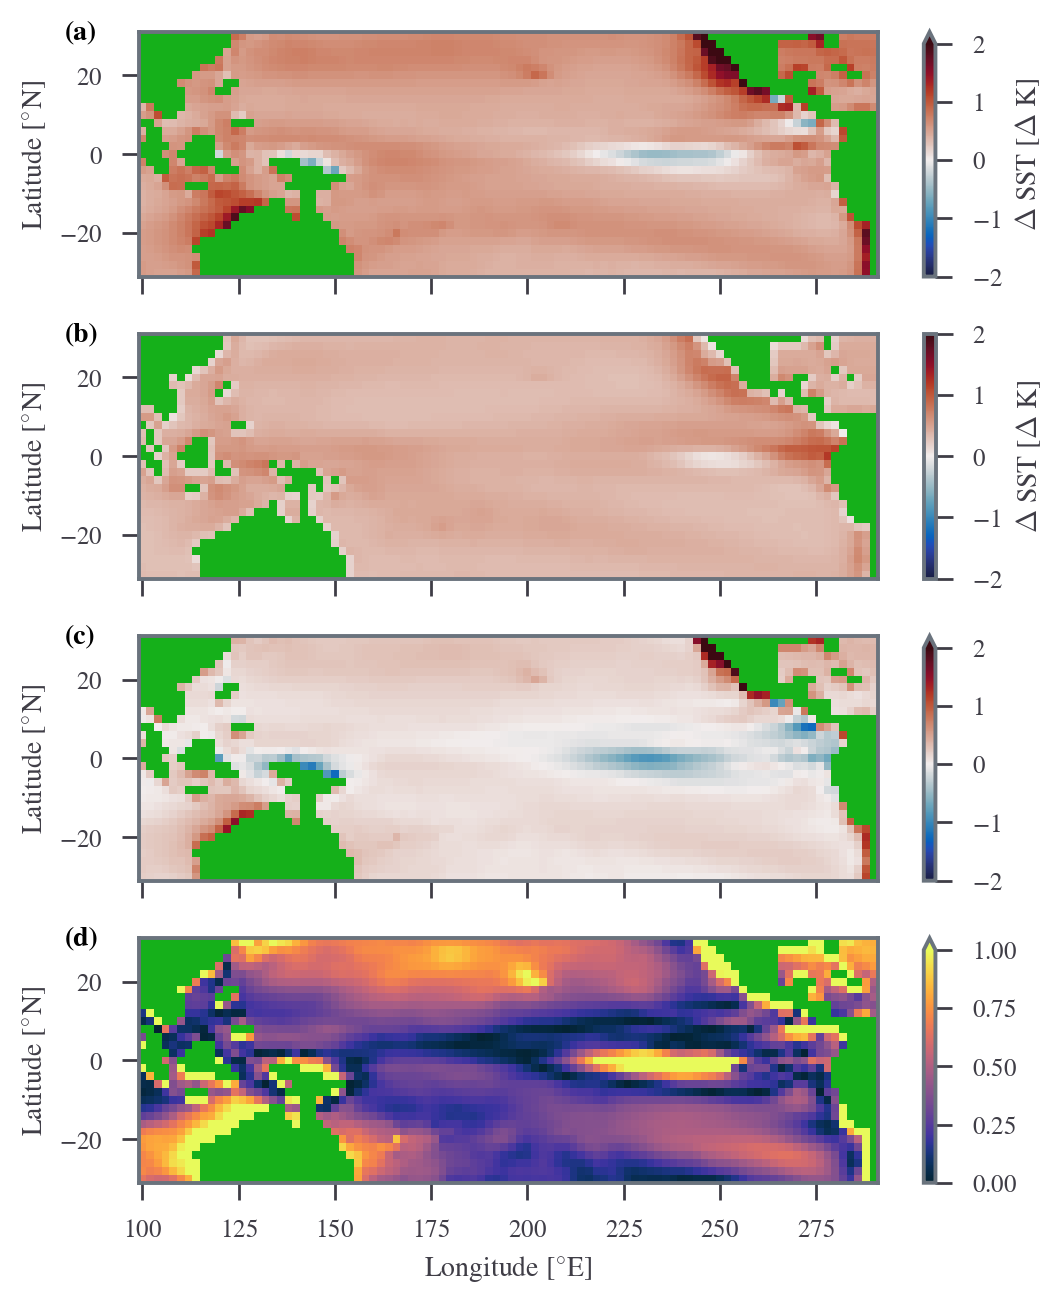

In [92]:
comp_oc_sst(coup_setup, "5a", show_plots=True)